In [1]:
%load_ext autoreload
%autoreload 2

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
from pathlib import Path
import time
import napari

os.chdir('/home/ali/packages/s2p-lbm/')

from suite3d.job import Job
from suite3d import lbmio, utils, ui
from suite3d.io import get_tif_tag
from suite3d.io import tiff_utils as tfu
from suite3d import file_utils as flu
import colorcet

/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/paramiko/pkey.py:100: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
/home/ali/anaconda3/envs/suite3d-gpu/lib/python3.8/site-packages/paramiko/transport.py:258: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


In [3]:

# Create the job
job = Job('/mnt/md0/runs','SS003_2024-08-06_2', create=False)

   Found and loaded params from /mnt/md0/runs/s3d-SS003_2024-08-06_2/params.npy


In [4]:
summary = job.load_summary()
img3d = summary['ref_img_3d']

## Plot the stack and z-view

In [5]:
fig_dir = Path('/mnt/md0/s3d-figures')
figname = 'stack3d'
fdir = fig_dir / figname
os.makedirs(fdir, exist_ok=True)

In [6]:
clipy = (50, 850)
clipx = (50, 650)
nz, ny, nx = img3d.shape

In [7]:
mov = job.get_registered_movie()#.compute()

In [14]:
# img = mov.mean(axis=1).compute()

In [ ]:
# plane_idx = 15
# for plane_idx in range(nz):
#     f,ax,__ = tfu.show_tif(img3d[plane_idx, clipy[0]:clipy[1], clipx[0]:clipx[1]],
#                            facecolor='none', figsize=(12,24), dpi=200)
#     plt.savefig(fdir / f"plane-{plane_idx:02d}.svg", bbox_inches='tight',pad_inches=0)


In [33]:
pz, py, px = 20, 3.0, 3.0 

In [51]:
936 * 3

2808

In [52]:
720 * 3

2160

In [49]:
img_mnorm.shape

(24, 936, 720)

In [43]:
img_mnorm = img / img.mean(axis=(1,2), keepdims=True)
img_pnorm = img / n.percentile(img, q=90, axis=(1,2),keepdims=True)

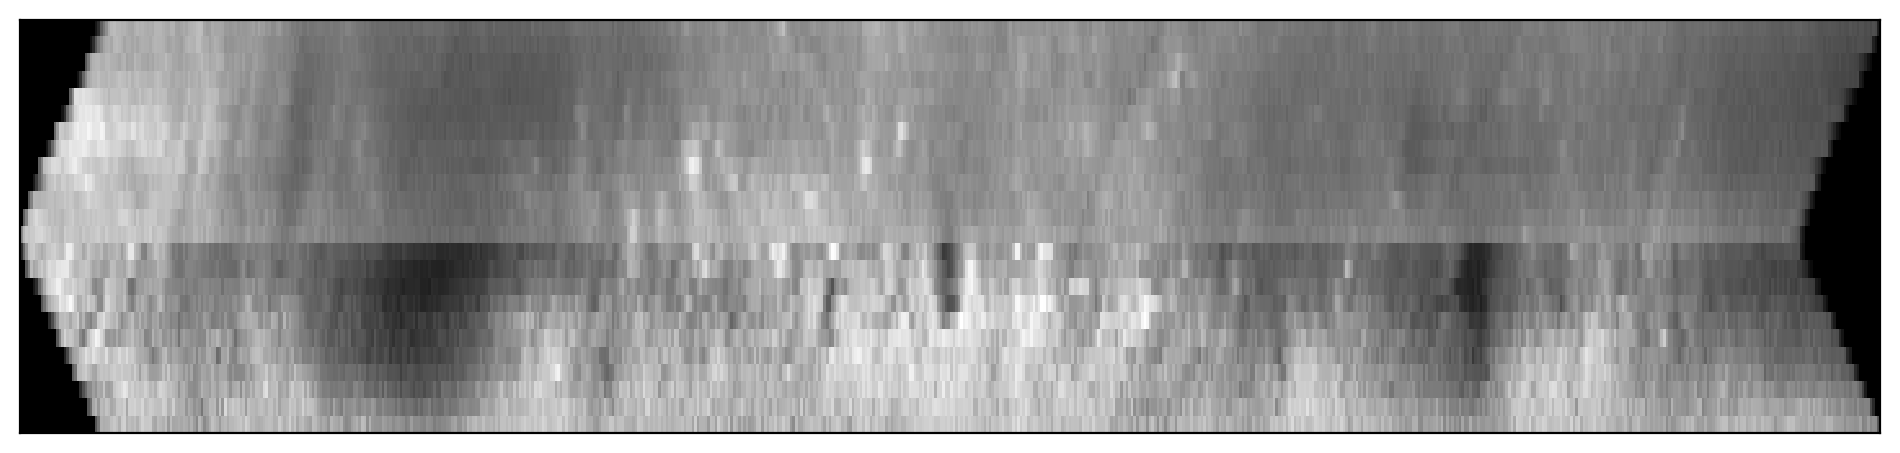

In [48]:
tfu.show_tif(img_pnorm[:25,600], px_py = (py,pz), vminmax_percentile=(0,99.99), figsize=(12,10),dpi=200)
plt.savefig(fdir / "zview-600.svg", bbox_inches='tight',pad_inches=0)

In [55]:
rois = job.load_segmentation_results()

      Loading from /mnt/md0/runs/s3d-SS003_2024-08-06_2/rois/info.npy
      Loading from /mnt/md0/runs/s3d-SS003_2024-08-06_2/rois/stats.npy
      Loading from /mnt/md0/runs/s3d-SS003_2024-08-06_2/rois/iscell.npy


## Make 3D Seg Figure

In [56]:
seg = rois

In [60]:
iscell =seg['iscell'][:,0].astype(bool)

In [66]:
good_cells = n.arange(len(seg['stats']))[iscell]

In [67]:
n.random.seed(10)
shuff_cells = good_cells.copy()
n.random.shuffle(shuff_cells)

In [79]:
n_files = 8
nc = len(shuff_cells)
batchsize = nc // n_files
for i in range(n_files):
    cx = shuff_cells[i*batchsize:i*batchsize + batchsize]
    filefilt = n.zeros_like(iscell)
    filefilt[cx] = True

    __, filevol = ui.make_label_vols(seg['stats'], img.shape, lam_max=1.0, cmap='cet_glasbey_dark',
                                             iscell = filefilt)
    tfu.save_mrc('/mnt/md0/s3d-figures/fig1-mrcs/',f'subset_cells_c{i:02d}.mrc', filevol[:,:,:,3],
            voxel_size=(3.0,3.0, 20))

In [78]:
filevol[:,:,:,-1].shape

(24, 936, 720)

dask.array<astype, shape=(24, 2168, 936, 720), dtype=float32, chunksize=(24, 100, 936, 720), chunktype=numpy.ndarray>